**INTRODUCTION**

Popularitas lagu sering kali menjadi tolok ukur kesuksesan dalam industri musik. Bagi artis, produser, dan label rekaman, memahami faktor-faktor yang menentukan popularitas lagu sangat penting untuk menciptakan karya yang tidak hanya relevan secara artistik, tetapi juga menarik bagi audiens. Dengan berkembangnya platform streaming musik seperti Spotify, data terkait performa lagu kini dapat diakses dengan lebih mudah. Penelitian mengenai prediksi popularitas lagu dapat membantu industri musik membuat keputusan yang lebih strategis dan meningkatkan peluang kesuksesan bagi lagu-lagu baru.

Pada penelitian ini, prediksi popularitas lagu dilakukan dengan menggunakan teknik klasifikasi, yaitu **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, dan **Extreme Gradient Boosting (XGBoost)**.

# Prepare Data

In [ ]:
# Memuat package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Menonaktifkan pesan peringatan
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# URL raw dari dataset di GitHub
url = 'https://raw.githubusercontent.com/Akhtarazizi/ProyekAkhirAnalisisBigData/main/spotify_songs.csv'

# Membaca dataset langsung dari GitHub
df = pd.read_csv(url)

In [ ]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# EDA

Dataset ini terdiri dari 32.833 entri, dengan beberapa variabel penting yang digunakan untuk analisis popularitas lagu. Berikut adalah ringkasan untuk masing-masing variabel:

In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Berdasarkan analisis deskriptif yang ditampilkan, dapat disimpulkan bahwa :

*  **Track Popularity**: Distribusi popularitas lagu, dengan rata-rata sebesar 42.48.
*  **Danceability dan Energy**: Menunjukkan karakteristik akustik lagu, yang memiliki nilai rata-rata masing-masing 0.65 dan 0.70.

*  **Loudness**: Mengukur tingkat kekerasan suara dengan nilai rata-rata -6.72 dB.

*  **Duration (duration_ms)**: Memberikan informasi tentang durasi lagu dalam milidetik, dengan rata-rata 225,799 ms (~3 menit 46 detik).


 **Ringkasan Dataset yang Telah Dibersihkan**

| **Variabel**          | **Mean**      | **Std Dev**    | **Min**        | **25%**        | **Median (50%)** | **75%**        | **Max**        | **Deskripsi Singkat**                                                                                     |
|------------------------|---------------|----------------|----------------|----------------|-------------------|----------------|----------------|-----------------------------------------------------------------------------------------------------------|
| **track_popularity**   | 42.48         | 24.98          | 0.00           | 24.00          | 45.00             | 62.00          | 100.00         | Nilai popularitas lagu, berkisar dari 0 (tidak populer) hingga 100 (sangat populer).                      |
| **danceability**       | 0.65          | 0.15           | 0.00           | 0.56           | 0.67              | 0.76           | 0.98           | Mengukur seberapa cocok lagu untuk menari, nilai lebih tinggi berarti lebih ritmis dan menyenangkan.      |
| **energy**             | 0.70          | 0.18           | 0.00           | 0.58           | 0.72              | 0.84           | 1.00           | Menggambarkan intensitas dan aktivitas lagu; nilai tinggi menunjukkan lagu lebih energik.                |
| **key**                | 5.37          | 3.61           | 0.00           | 2.00           | 6.00              | 9.00           | 11.00          | Skala musik tempat lagu dibuat, berkisar dari 0 hingga 11 (berdasarkan tangga nada musik).                |
| **loudness**           | -6.72         | 2.99           | -46.45         | -8.17          | -6.17             | -4.65          | 1.27           | Rata-rata volume lagu dalam desibel (dB); nilai negatif menunjukkan volume lebih rendah dari standar.     |
| **mode**               | 0.57          | 0.50           | 0.00           | 0.00           | 1.00              | 1.00           | 1.00           | Indikator nada mayor (1) atau minor (0) pada lagu.                                                       |
| **speechiness**        | 0.11          | 0.10           | 0.00           | 0.04           | 0.06              | 0.13           | 0.92           | Mengukur keberadaan elemen lisan dalam lagu, seperti lirik atau percakapan.                              |
| **acousticness**       | 0.18          | 0.22           | 0.00           | 0.02           | 0.08              | 0.26           | 0.99           | Tingkat keakustikan lagu; nilai tinggi menunjukkan lagu lebih akustik.                                   |
| **instrumentalness**   | 0.08          | 0.22           | 0.00           | 0.00           | 0.00              | 0.00           | 0.99           | Mengindikasikan seberapa besar lagu adalah instrumental; nilai lebih tinggi menunjukkan minim lirik.     |
| **liveness**           | 0.19          | 0.15           | 0.00           | 0.09           | 0.13              | 0.25           | 0.99           | Mendeteksi kemungkinan audiens langsung; nilai tinggi menunjukkan lebih banyak unsur live.               |
| **valence**            | 0.51          | 0.23           | 0.00           | 0.33           | 0.51              | 0.69           | 0.99           | Mengukur emosi dalam lagu; nilai tinggi menunjukkan lagu lebih positif atau ceria.                       |
| **tempo**              | 120.88        | 26.90          | 0.00           | 99.96          | 121.98            | 133.92         | 239.44         | Kecepatan lagu dalam beat per minute (BPM).                                                              |
| **duration_ms**        | 225,800 ms    | 59,834 ms      | 4,000 ms       | 187,819 ms     | 216,000 ms        | 253,585 ms     | 517,810 ms     | Durasi lagu dalam milidetik; rata-rata sekitar 3 menit 45 detik.                                         |

 **Insight Utama**

Dataset ini memiliki distribusi yang cukup beragam untuk variabel utama seperti **track_popularity**, **energy**, dan **danceability**, yang memberikan gambaran tentang variasi karakteristik lagu. Variabel seperti **instrumentalness** dan **speechiness** menunjukkan pola distribusi dengan sebagian besar nilai mendekati nol, yang mencerminkan lagu-lagu dengan elemen lirik dominan dan minim instrumental murni.

In [ ]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  

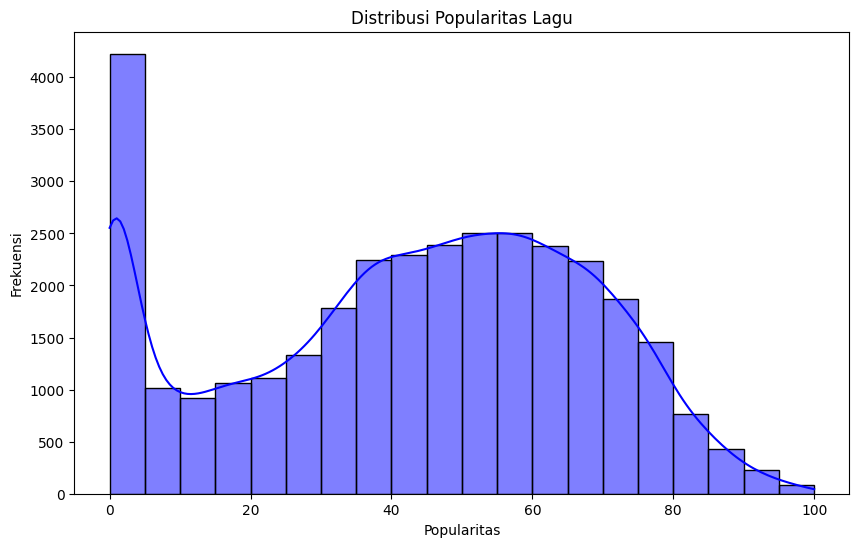

In [ ]:
# Distribusi Popularitas Lagu
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True, color='blue')
plt.title('Distribusi Popularitas Lagu')
plt.xlabel('Popularitas')
plt.ylabel('Frekuensi')
plt.show()

Dari plot di atas, dapat dianalisis bahwa :

- Bar pertama (popularitas sangat rendah) mendominasi frekuensi, yang kemungkinan besar mencakup **lagu baru**, **kurang dikenal**, atau **jarang dimainkan**.

- Distribusi Bimodal: Distribusi memiliki dua puncak utama:

    - Puncak pertama berada pada nilai popularitas rendah (0–10), yang mungkin menunjukkan banyak lagu dengan popularitas sangat rendah atau tidak sering diputar.
    - Puncak kedua berada di sekitar popularitas menengah hingga tinggi (40–70), yang menunjukkan banyak lagu cukup populer.


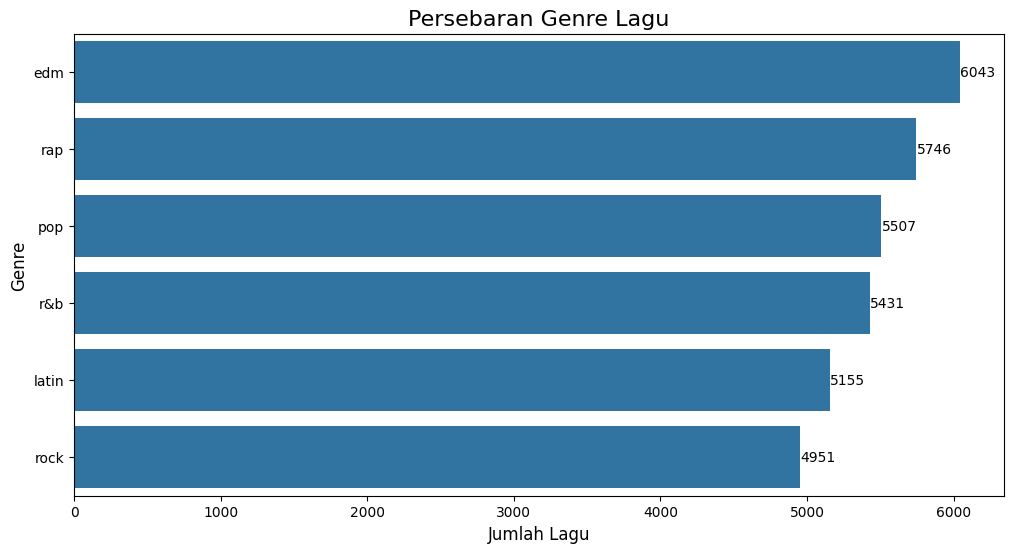

In [ ]:
plt.figure(figsize=(12, 6))
genre_counts = df['playlist_genre'].value_counts()
sns.countplot(y='playlist_genre', data=df, order=genre_counts.index)
plt.title('Persebaran Genre Lagu', fontsize=16)
plt.xlabel('Jumlah Lagu', fontsize=12)
plt.ylabel('Genre', fontsize=12)
for i, v in enumerate(genre_counts):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.show()

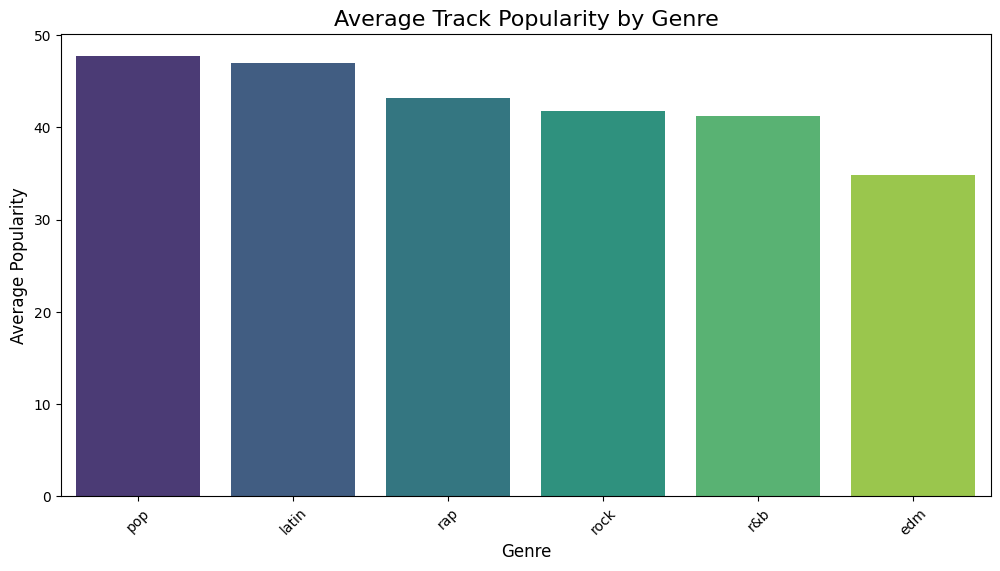

In [ ]:
popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()
popularity_by_genre = popularity_by_genre.sort_values(by='track_popularity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=popularity_by_genre, x='playlist_genre', y='track_popularity', palette='viridis')
plt.title('Average Track Popularity by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

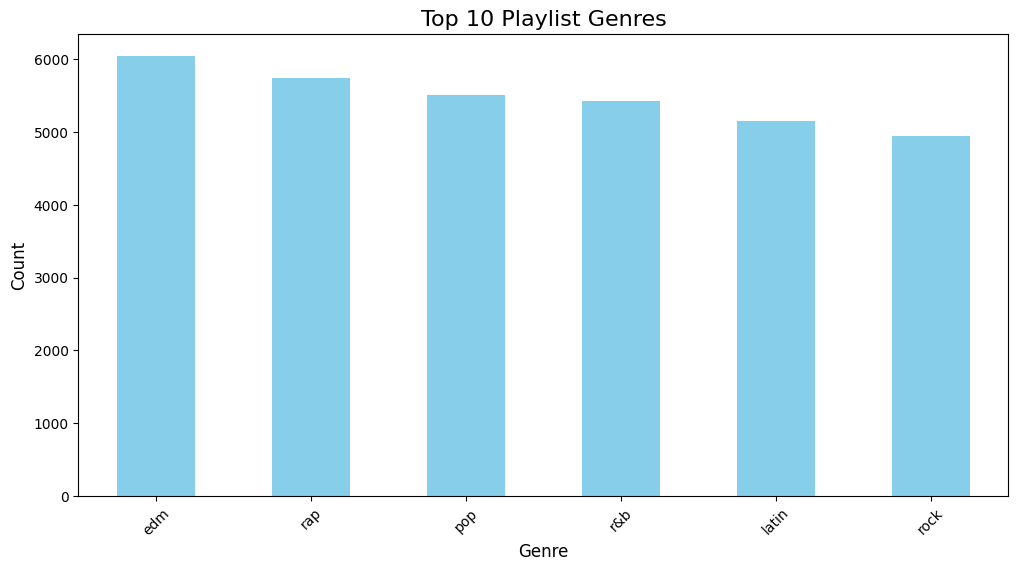

In [ ]:
genre_counts = df['playlist_genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Playlist Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

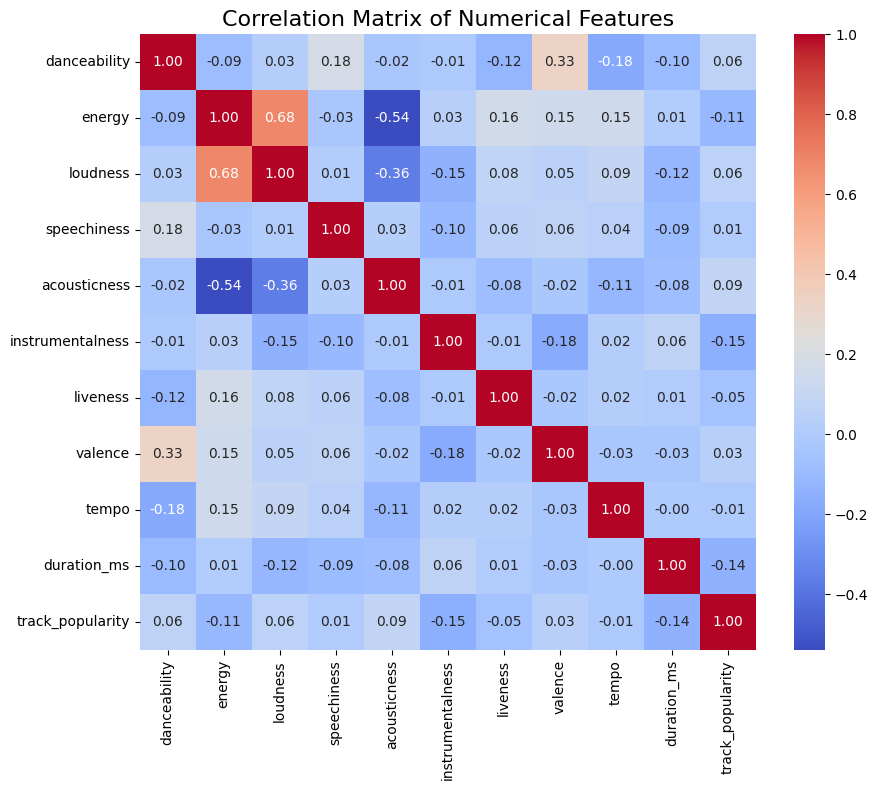

In [ ]:
# Select numerical columns
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness',
                  'valence', 'tempo', 'duration_ms', 'track_popularity']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

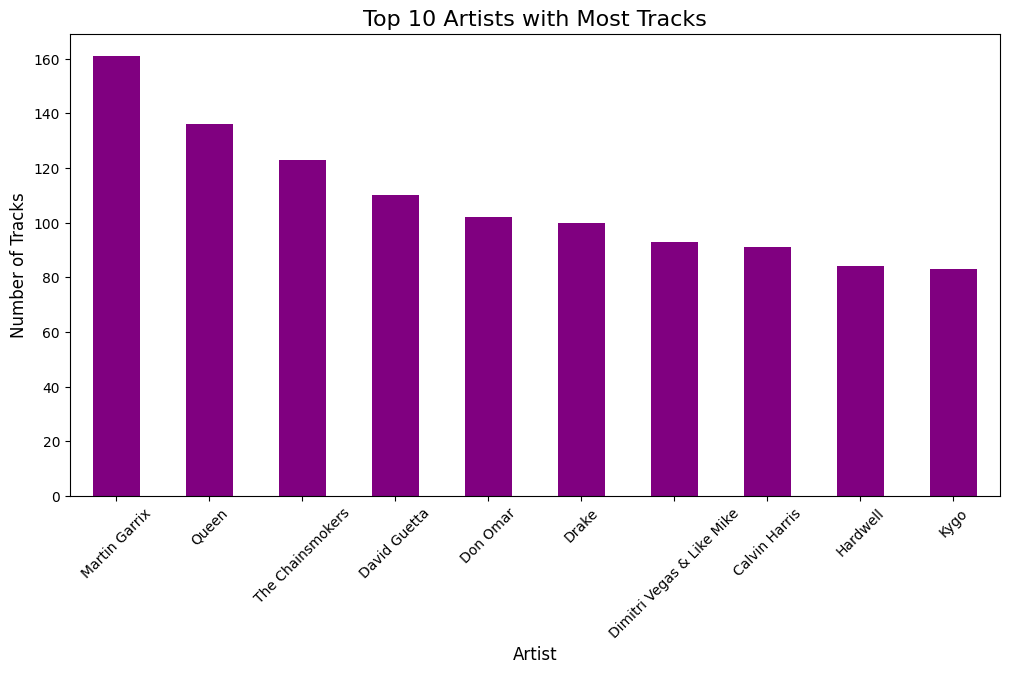

In [ ]:
artist_counts = df['track_artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
artist_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Artists with Most Tracks', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45)
plt.show()

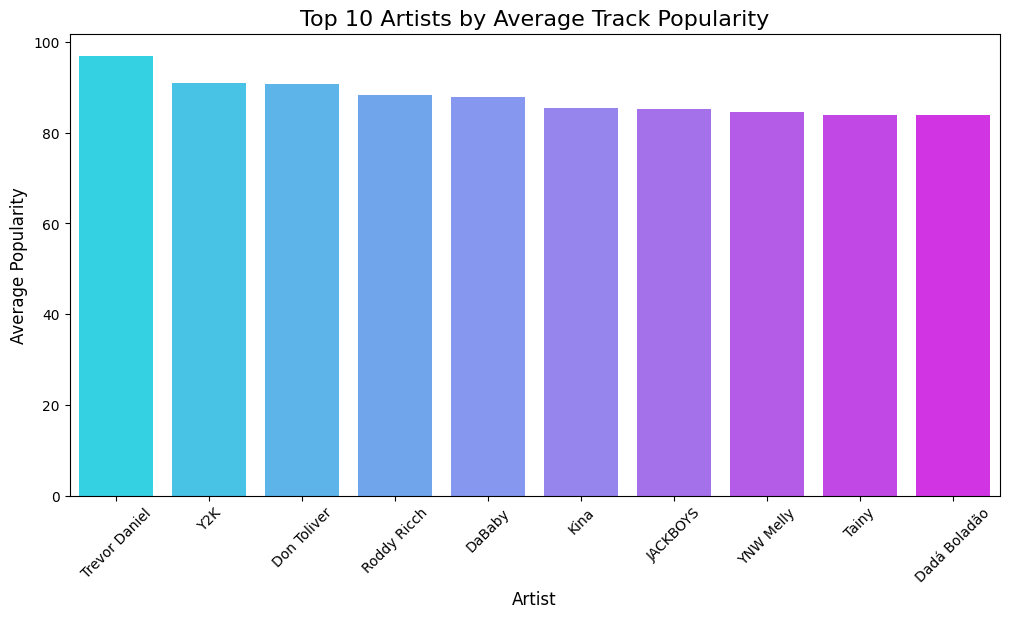

In [ ]:
popularity_by_artist = df.groupby('track_artist')['track_popularity'].mean().reset_index()
popularity_by_artist = popularity_by_artist.sort_values(by='track_popularity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=popularity_by_artist, x='track_artist', y='track_popularity', palette='cool')
plt.title('Top 10 Artists by Average Track Popularity', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#Membuat Variable Baru

In [ ]:
# Membuat fitur baru: rasio danceability terhadap energy
df['danceability_to_energy_ratio'] = df['danceability'] / df['energy']

# Menampilkan beberapa baris untuk melihat hasilnya
display(df[['danceability', 'energy', 'danceability_to_energy_ratio']].head())


,danceability,energy,danceability_to_energy_ratio
0,0.748,0.916,0.816594
1,0.726,0.815,0.890798
2,0.675,0.931,0.725027
3,0.718,0.930,0.772043
4,0.650,0.833,0.780312


Dengan membagi `danceability` dengan `energy`, kita dapat melihat apakah lagu dengan rasio tertentu lebih cenderung populer.

Kode yang ditampilkan di atas memperlihatkan proses penambahan kolom baru pada dataset `df` yang dinamakan `danceability_to_energy_ratio`. Kolom baru ini dihitung dengan cara membagi nilai dari kolom `danceability` dengan nilai dari kolom `energy` pada dataset tersebut. Proses ini bertujuan untuk menghasilkan sebuah rasio yang menggambarkan hubungan antara dua aspek utama dari sebuah lagu, yaitu seberapa mudah sebuah lagu untuk dinikmati sebagai tarian (danceability) dan seberapa energik lagu tersebut (energy). Dengan menambahkan fitur ini, kita dapat memperoleh wawasan yang lebih dalam mengenai dinamika sebuah lagu, apakah lagu tersebut lebih cenderung mudah untuk dinikmati sebagai tarian meskipun memiliki tingkat energi yang tinggi, atau sebaliknya.

Setelah kolom baru ini dihitung, kode kemudian menampilkan beberapa baris pertama dari dataframe menggunakan fungsi `display()` untuk memverifikasi hasil perhitungan dan memastikan bahwa fitur baru tersebut ditambahkan dengan benar. Kolom-kolom yang ditampilkan adalah `danceability`, `energy`, dan `danceability_to_energy_ratio`, yang masing-masing menunjukkan nilai untuk tingkat danceability, tingkat energy, dan rasio antara keduanya. Hasil yang ditampilkan menunjukkan variasi rasio pada beberapa baris pertama dataset, memberikan gambaran tentang bagaimana tingkat danceability berhubungan dengan tingkat energy pada setiap lagu. Sebagai contoh, pada baris pertama, rasio tersebut adalah 0.816594, yang berarti bahwa tingkat danceability lagu tersebut adalah sekitar 81% dari tingkat energinya. Rasio ini bisa membantu dalam analisis lebih lanjut mengenai karakteristik musik dan preferensi pendengar, misalnya apakah lagu dengan rasio tinggi cenderung lebih disukai dalam konteks tarian atau kegiatan energik lainnya.

In [ ]:
# Menambahkan kolom baru: Rasio Energi terhadap Popularitas
df['energy_popularity_ratio'] = df['energy'] / (df['track_popularity'] + 1)  # +1 untuk menghindari pembagian nol

print("\nKolom Baru Ditambahkan:")
print(df[['energy', 'track_popularity', 'energy_popularity_ratio']].head())


Kolom Baru Ditambahkan:
   energy  track_popularity  energy_popularity_ratio
0   0.916              66.0                 0.013672
1   0.815              67.0                 0.011985
2   0.931              70.0                 0.013113
3   0.930              60.0                 0.015246
4   0.833              69.0                 0.011900


Kode yang ditampilkan di atas memperlihatkan proses penambahan kolom baru pada dataset `df` yang dinamakan `energy_popularity_ratio`. Kolom ini dihitung dengan cara membagi nilai `energy` dengan `track_popularity + 1`. Penambahan `1` pada pembagi bertujuan untuk menghindari pembagian dengan nol, yang bisa menyebabkan error atau hasil yang tidak valid. Rasio yang dihasilkan menggambarkan hubungan antara tingkat energi sebuah lagu dan popularitasnya. Hal ini memberikan perspektif baru dalam analisis data musik, memungkinkan kita untuk mengukur seberapa besar energi suatu lagu berkontribusi terhadap keberhasilannya di mata pendengar, yang tercermin dari popularitas lagu tersebut.

Sebagai contoh, lagu pertama dalam dataset memiliki nilai energi 0.916 dan tingkat popularitas 66. Dengan rumus yang diterapkan, rasio `energy_popularity_ratio` yang dihasilkan adalah 0.013672. Rasio ini tidak hanya memberikan informasi kuantitatif mengenai hubungan antara dua atribut penting dalam musik (energi dan popularitas), tetapi juga berfungsi sebagai alat untuk mengeksplorasi pola-pola yang mungkin ada dalam data. Rasio ini bisa membuka peluang baru dalam mengidentifikasi faktor-faktor yang memengaruhi popularitas lagu, yang sebelumnya mungkin tidak terlalu jelas hanya dengan melihat masing-masing atribut secara terpisah. Dengan pendekatan ini, kita bisa menemukan wawasan baru yang berguna, baik untuk analisis data yang lebih mendalam maupun untuk pengembangan model prediksi yang lebih akurat mengenai keberhasilan lagu di pasar musik.

# Pre-Processing

Sebelum melakukan klasifikasi, data harus melalui proses pembersihan (data cleaning) untuk beberapa alasan berikut:

- Algoritma pembelajaran mesin sering kali tidak dapat menangani missing values secara langsung atau dapat menghasilkan prediksi yang kurang akurat jika data tidak lengkap.

- Pembersihan data membantu menjaga konsistensi dan integritas dataset, yang sangat penting agar analisis yang dilakukan lebih valid dan dapat diandalkan.

- Peningkatan kinerja model: dengan melakukan data cleaning, seperti menangani missing values atau data duplikat dengan cara yang tepat (misalnya imputasi, penghapusan, atau penggantian dengan nilai tertentu), dapat meningkatkan kinerja model, membuat model lebih generalizable, dan menghasilkan prediksi yang lebih baik.

In [ ]:
print("Missing Values Sebelum Handling:")
print(df.isnull().sum())

# Mengimputasi missing values
imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Mengisi missing values pada kolom object dengan mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing Values Setelah Handling:")
print(df.isnull().sum())

Missing Values Sebelum Handling:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64
Missing Values Setelah Handling:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name        

In [ ]:
duplicate_counts = df.duplicated().sum()
print(f"Jumlah duplikat data: {duplicate_counts}")

Jumlah duplikat data: 0


In [ ]:
# Pilih fitur yang relevan
features = ["danceability", "energy", "key", "loudness", "speechiness",
            "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
X = df[features]

Fitur-fitur seperti `danceability`, `energy`, `key`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, dan `tempo` dipilih karena merepresentasikan karakteristik audio utama yang memengaruhi persepsi dan preferensi pendengar terhadap sebuah lagu. Misalnya, fitur `danceability` dan `valence` mencerminkan suasana dan kenyamanan lagu untuk didengarkan atau digunakan dalam aktivitas tertentu, sementara `energy` dan `loudness` menunjukkan intensitas yang menarik perhatian audiens. Fitur-fitur ini relevan karena mampu menangkap elemen-elemen musikal yang sering kali berkontribusi pada popularitas lagu, seperti daya tarik emosional, genre, dan pengalaman audiens, sehingga dapat membantu model dalam memahami pola yang berkaitan dengan tingkat popularitas.

## Transformasi Data


In [ ]:
# Normalisasi teks: lowercase dan hapus tanda baca
df['track_name'] = df['track_name'].str.lower().str.replace('[^\w\s]', '', regex=True)
df['track_artist'] = df['track_artist'].str.lower().str.replace('[^\w\s]', '', regex=True)
df['track_album_name'] = df['track_album_name'].str.lower().str.replace('[^\w\s]', '', regex=True)
df['playlist_name'] = df['playlist_name'].str.lower().str.replace('[^\w\s]', '', regex=True)

In [ ]:
# Encoding kolom kategorikal
if 'playlist_genre' in df.columns:
    encoder = LabelEncoder()
    df['playlist_genre'] = encoder.fit_transform(df['playlist_genre'])

In [ ]:
# Normalisasi Fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

Normalisasi fitur digunakan untuk mengatasi Perbedaan Skal dimana beberapa fitur mungkin memiliki rentang nilai yang berbeda (misalnya, loudness dengan nilai negatif hingga positif, sementara tempo memiliki nilai dalam ratusan). Perbedaan skala ini dapat menyebabkan algoritma yang sensitif terhadap jarak, seperti KNN atau SVM, memberikan bobot lebih besar pada fitur dengan skala lebih besar.

## Drop Kolom yang tidak diperlukan

In [ ]:
df = df.drop(['track_id', 'track_album_id', 'playlist_id'], axis=1)

kolom `track_id`, `track_album_id`, dan `playlist_id` dihapus karena kolom-kolom tersebut tidak terdapat nilai yang spesifik sehingga tidak dapat atau tidak ada kelayakan untuk melakukan analisis dimana kolom tersebut berisikan angka dan huruf bercampuran.

## Pengecekan data setelah di pre-processing

In [ ]:
print("\nData Setelah Pembersihan:")
df.head()


Data Setelah Pembersihan:


,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,i dont care with justin bieber loud luxury remix,ed sheeran,66.0,i dont care with justin bieber loud luxury remix,2019-06-14,pop remix,2,dance pop,0.748,0.916,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,memories dillon francis remix,maroon 5,67.0,memories dillon francis remix,2019-12-13,pop remix,2,dance pop,0.726,0.815,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,all the time don diablo remix,zara larsson,70.0,all the time don diablo remix,2019-07-05,pop remix,2,dance pop,0.675,0.931,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,call you mine keanu silva remix,the chainsmokers,60.0,call you mine the remixes,2019-07-19,pop remix,2,dance pop,0.718,0.930,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,someone you loved future humans remix,lewis capaldi,69.0,someone you loved future humans remix,2019-03-05,pop remix,2,dance pop,0.650,0.833,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
track_name                  0
track_artist                0
track_popularity            0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


#Visualisasi Data

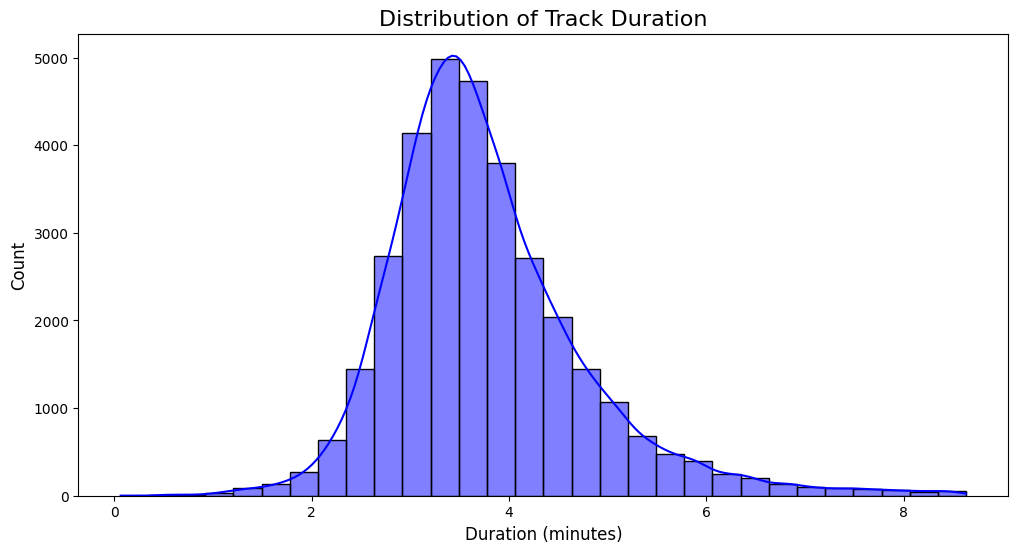

In [ ]:
# Convert duration to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_min'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Untuk mengelompokkan popularitas lagu, berikut adalah kategorinya:  

- **High**: Lagu dianggap sangat populer jika memiliki nilai popularitas di atas 80.  
- **Medium**: Lagu dianggap memiliki tingkat popularitas sedang jika nilai popularitasnya berada dalam rentang 50 hingga 80 (inklusif).  
- **Low**: Lagu dianggap kurang populer jika nilai popularitasnya di bawah 50.  

In [ ]:
def categorize_popularity(popularity):
    if popularity > 80:
        return "High"
    elif 50 <= popularity <= 80:
        return "Medium"
    else:
        return "Low"

df['popularity_category'] = df['track_popularity'].apply(categorize_popularity)
y = df['popularity_category']

# Model Klasifikasi

Membandingkan beberapa algoritma klasifikasi penting untuk mengidentifikasi model terbaik yang sesuai dengan dataset tertentu, meningkatkan akurasi, dan memahami kekuatan serta kelemahan tiap algoritma. Proses ini membantu memastikan hasil yang lebih robust, menyesuaikan kompleksitas model dengan kebutuhan, dan memberikan dasar empiris dalam pengambilan keputusan. Selain itu, perbandingan dapat mengatasi ketidakpastian pada dataset serta mendukung aplikasi yang efisien dalam berbagai kondisi data dan keterbatasan sumber daya.

## KNN


Dalam konteks prediksi popularitas lagu, KNN mengklasifikasikan lagu menjadi kategori "High", "Medium", atau "Low" berdasarkan fitur-fitur lagu seperti audio features dan metadata. Untuk setiap lagu yang ingin diprediksi, algoritma ini **menghitung jarak antara lagu tersebut dengan lagu-lagu lain dalam dataset latih, kemudian memilih K tetangga terdekat**. Lagu tersebut akan dikategorikan sesuai dengan mayoritas kategori dari K tetangga tersebut. Pemilihan nilai K dan metrik jarak yang tepat penting untuk kinerja model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5842850616719963
Classification Report:
               precision    recall  f1-score   support

        High       0.44      0.70      0.54       255
         Low       0.64      0.66      0.65      3674
      Medium       0.51      0.46      0.49      2638

    accuracy                           0.58      6567
   macro avg       0.53      0.61      0.56      6567
weighted avg       0.58      0.58      0.58      6567



- Precision: Mengukur seberapa banyak prediksi kategori tersebut benar di antara semua prediksi yang dibuat. Misalnya, precision untuk kategori "High" adalah 0.44, yang berarti hanya 44% prediksi untuk kategori "High" yang benar.

- Recall: Mengukur seberapa banyak data sebenarnya dari kategori tersebut yang berhasil diprediksi dengan benar. Recall untuk kategori "High" adalah 0.70, yang berarti 70% dari lagu yang benar-benar memiliki popularitas "High" berhasil diprediksi dengan benar.

- F1-Score: Merupakan rata-rata harmonik antara precision dan recall, memberikan gambaran keseimbangan antara keduanya. F1-score untuk kategori "High" adalah 0.54, menunjukkan keseimbangan yang cukup rendah antara precision dan recall untuk kategori tersebut.

- Support: Menunjukkan jumlah data yang ada di setiap kategori. Misalnya, ada 255 lagu dengan kategori "High".

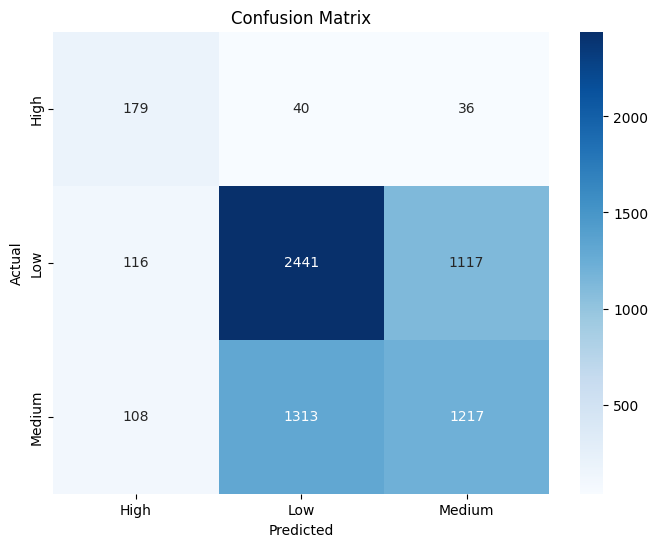

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your KNN model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictions = pd.DataFrame({
    "Track Name": df.loc[y_test.index, "track_name"].values,
    "Artist": df.loc[y_test.index, "track_artist"].values,
    "Actual Popularity": y_test.values,
    "Predicted Popularity": y_pred
})
display(predictions.head())

,Track Name,Artist,Actual Popularity,Predicted Popularity
0,i miss you,jeriqo,Low,Medium
1,who are you,the who,Low,Low
2,happy,the beef seeds,Low,Medium
3,one,rev theory,Low,Low
4,palacecurse,the internet,Medium,Low


In [ ]:
artist_name = input("Masukkan nama artis: ")

artist_data = df[df['track_artist'].str.lower() == artist_name.lower()]

if artist_data.empty:
    print(f"Tidak ada data untuk artis {artist_name}.")
else:
    print("\nStatistik Deskriptif untuk artis", artist_name, ":")
    display(artist_data.describe())

    # Tampilkan apakah lagu-lagu artis tersebut populer atau tidak
    artist_data['Predicted Popularity'] = artist_data['track_popularity'].apply(categorize_popularity)
    print("\nPopularitas lagu-lagu artis:")
    display(artist_data[['track_name', 'Predicted Popularity']])

Masukkan nama artis: jeriqo

Statistik Deskriptif untuk artis jeriqo :


,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,46.000000,2.000000,0.668500,0.718000,2.500000,-6.794000,0.500000,0.052100,0.010605,0.125507,0.178300,0.477000,158.804500,202167.000000,3.369450
std,1.414214,2.828427,0.210011,0.100409,3.535534,1.305319,0.707107,0.012587,0.008054,0.177474,0.136754,0.087681,21.526452,20053.548314,0.334226
min,45.000000,0.000000,0.520000,0.647000,0.000000,-7.717000,0.000000,0.043200,0.004910,0.000013,0.081600,0.415000,143.583000,187987.000000,3.133117
25%,45.500000,1.000000,0.594250,0.682500,1.250000,-7.255500,0.250000,0.047650,0.007757,0.062760,0.129950,0.446000,151.193750,195077.000000,3.251283
50%,46.000000,2.000000,0.668500,0.718000,2.500000,-6.794000,0.500000,0.052100,0.010605,0.125507,0.178300,0.477000,158.804500,202167.000000,3.369450
75%,46.500000,3.000000,0.742750,0.753500,3.750000,-6.332500,0.750000,0.056550,0.013452,0.188253,0.226650,0.508000,166.415250,209257.000000,3.487617
max,47.000000,4.000000,0.817000,0.789000,5.000000,-5.871000,1.000000,0.061000,0.016300,0.251000,0.275000,0.539000,174.026000,216347.000000,3.605783



Popularitas lagu-lagu artis:


,track_name,Predicted Popularity
8800,holdin on all day,Low
30056,i miss you,Low


Untuk melihat keberhasilan model dalam hal klasifikasi, maka diuji menggunakan inputan user sederhana. dengan menginputkan nama artist maka akan menampilkan judul lagu atau `track_name` dan hasil klasifikasi.

## XGBoost

Dalam konteks prediksi popularitas lagu, XGBoost digunakan untuk memprediksi kategori popularitas lagu ("High", "Medium", atau "Low") dengan **membangun model yang menggabungkan beberapa pohon keputusan secara berurutan, di mana setiap pohon keputusan baru berfokus pada kesalahan yang dibuat oleh pohon sebelumnya**. XGBoost mengoptimalkan proses ini dengan cara memperbaiki prediksi melalui gradient descent dan regularization untuk menghindari overfitting. Fitur-fitur yang digunakan untuk prediksi, seperti audio features dan metadata, diolah untuk membangun pohon keputusan yang kuat dan mampu menangani hubungan non-linear antara fitur dan kategori target. **Keunggulan XGBoost terletak pada kemampuannya untuk menangani data besar, memiliki kecepatan yang tinggi, dan menghasilkan model yang lebih akurat dibandingkan metode lain seperti KNN, terutama dalam dataset yang kompleks dan besar**.

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.659814222628293


              precision    recall  f1-score   support

        High       0.96      0.69      0.80       255
      Medium       0.67      0.78      0.73      3674
         Low       0.60      0.48      0.54      2638

    accuracy                           0.66      6567
   macro avg       0.75      0.65      0.69      6567
weighted avg       0.66      0.66      0.65      6567



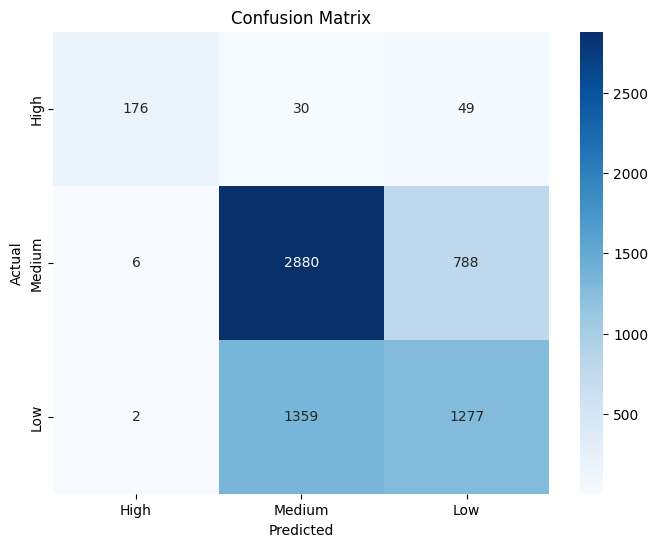

In [ ]:
def plot_classification_report_and_confusion_matrix(y_true, y_pred, labels):

    print(classification_report(y_true, y_pred, target_names=labels))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

labels = ['High', 'Medium', 'Low']
plot_classification_report_and_confusion_matrix(y_test, y_pred, labels)

Berdasarkan hasil classification report di atas dapat ditarik kesimpulan bahwa hasil evaluasi model XGBoost menunjukkan akurasi 66% pada dataset dengan tiga kategori popularitas lagu ("High", "Medium", dan "Low"). Precision, recall, dan F1-score untuk setiap kategori berbeda, dengan kategori "High" memiliki precision tinggi (0.96) tetapi recall yang lebih rendah (0.69), yang menunjukkan model sangat tepat dalam memprediksi kategori "High", meskipun tidak mengenali semua data yang termasuk dalam kategori ini. Untuk kategori "Medium", precision (0.67) dan recall (0.78) menunjukkan kinerja yang seimbang, sementara kategori "Low" memiliki precision yang lebih rendah (0.60) dan recall yang juga lebih rendah (0.48), menunjukkan bahwa model kesulitan dalam mengidentifikasi lagu dengan popularitas "Low". Secara keseluruhan, model ini lebih efektif dalam memprediksi kategori dengan jumlah data lebih besar, seperti "Medium", tetapi kurang akurat dalam memprediksi kategori "Low".

## SVM

Support Vector Machine (SVM) dalam prediksi popularitas lagu bekerja dengan cara memisahkan lagu-lagu ke dalam kategori popularitas ("High", "Medium", atau "Low") berdasarkan fitur-fitur lagu, seperti audio features dan metadata. **SVM mencari hyperplane (garis pemisah) yang membedakan kategori-kategori tersebut dengan memaksimalkan margin antara data dari setiap kategori**. Jika data tidak dapat dipisahkan secara linear, SVM menggunakan kernel untuk memetakan data ke dimensi yang lebih tinggi agar pemisahan antar kelas dapat dilakukan. Dengan cara ini, SVM dapat memprediksi kategori popularitas lagu berdasarkan pola yang ditemukan dalam data latih.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [ ]:
svm = SVC(C=1, kernel='rbf', gamma='scale', class_weight=class_weight_dict, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1,
    class_weight={0: 8.069431643625192, 1: 0.5956414268544346,
                  2: 0.8352731666984672},
    random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

              precision    recall  f1-score   support

        High       0.14      0.81      0.23       255
      Medium       0.69      0.50      0.58      3674
         Low       0.48      0.44      0.46      2638

    accuracy                           0.49      6567
   macro avg       0.44      0.58      0.42      6567
weighted avg       0.59      0.49      0.52      6567



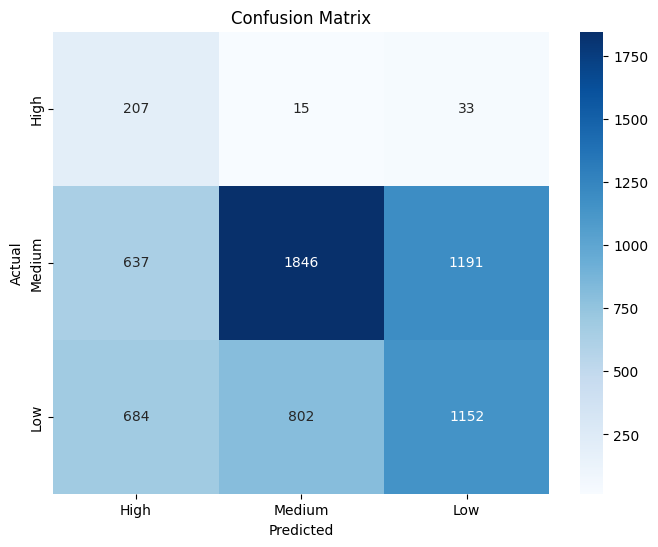

In [ ]:
def plot_classification_report_and_confusion_matrix(y_true, y_pred, labels):

    print(classification_report(y_true, y_pred, target_names=labels))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

labels = ['High', 'Medium', 'Low']
plot_classification_report_and_confusion_matrix(y_test, y_pred, labels)

Hasil evaluasi model SVM menunjukkan akurasi sebesar 49% pada dataset dengan tiga kategori popularitas lagu ("High", "Medium", dan "Low"). Precision, recall, dan F1-score untuk kategori "High" sangat rendah, dengan precision hanya 0.14 dan recall 0.81, yang berarti model kesulitan dalam memprediksi dengan tepat lagu-lagu "High" meskipun dapat mengenali sebagian besar data dengan kategori ini. Kategori "Medium" memiliki precision 0.69 dan recall 0.50, menunjukkan bahwa model lebih baik dalam memprediksi kategori ini, tetapi masih ada kesalahan. Untuk kategori "Low", precision 0.48 dan recall 0.44 menunjukkan bahwa model juga kesulitan memprediksi kategori ini dengan akurat. Secara keseluruhan, model menunjukkan kinerja yang lebih baik dalam mengklasifikasikan kategori dengan lebih banyak data, seperti "Medium", tetapi kurang efektif dalam kategori lainnya.

In [ ]:
artist_name = input("Masukkan nama artis: ")

artist_data = df[df['track_artist'].str.lower() == artist_name.lower()]

if artist_data.empty:
    print(f"Tidak ada data untuk artis {artist_name}.")
else:
    print("\nStatistik Deskriptif untuk artis", artist_name, ":")
    display(artist_data.describe())

    # Tampilkan apakah lagu-lagu artis tersebut populer atau tidak
    artist_data['Predicted Popularity'] = artist_data['track_popularity'].apply(categorize_popularity)
    print("\nPopularitas lagu-lagu artis:")
    display(artist_data[['track_name', 'Predicted Popularity']])


Masukkan nama artis: adele

Statistik Deskriptif untuk artis adele :


,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,60.941176,1.823529,0.624294,0.539000,6.117647,-6.691235,0.470588,0.049206,0.360981,0.000040,0.110771,0.456647,124.273706,243920.941176,4.065349
std,23.373250,1.014599,0.147077,0.157023,3.568654,1.443664,0.514496,0.029895,0.363138,0.000156,0.046951,0.193024,31.243880,31757.088637,0.529285
min,0.000000,0.000000,0.305000,0.321000,0.000000,-8.390000,0.000000,0.024900,0.004080,0.000000,0.047300,0.190000,79.830000,197347.000000,3.289117
25%,57.000000,2.000000,0.554000,0.431000,5.000000,-8.251000,0.000000,0.028000,0.041500,0.000000,0.085400,0.288000,104.941000,223080.000000,3.718000
50%,71.000000,2.000000,0.688000,0.524000,6.000000,-6.338000,0.000000,0.029800,0.191000,0.000000,0.099600,0.507000,135.047000,228293.000000,3.804883
75%,75.000000,2.000000,0.727000,0.673000,9.000000,-5.876000,1.000000,0.085300,0.776000,0.000003,0.129000,0.562000,157.980000,277947.000000,4.632450
max,79.000000,3.000000,0.842000,0.770000,11.000000,-3.882000,1.000000,0.103000,0.952000,0.000646,0.215000,0.918000,164.068000,295502.000000,4.925033



Popularitas lagu-lagu artis:


,track_name,Predicted Popularity
1216,someone like you,Medium
1264,set fire to the rain,Medium
2710,send my love to your new lover,Medium
2865,rolling in the deep,Medium
3780,rolling in the deep,Medium
3781,hello,Medium
3784,someone like you,Medium
4184,right as rain,Medium
5056,tired,Low
20735,someone like you,Medium


#Klasifikasi Lagu Berdasarkan Popularitas

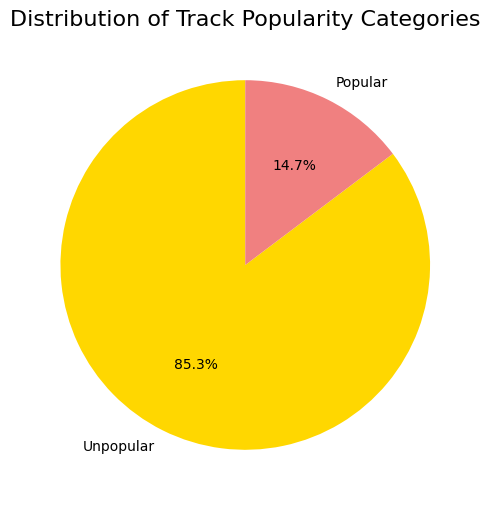

In [ ]:
popularity_threshold = 70

df['popularity_category'] = df['track_popularity'].apply(
    lambda x: 'Popular' if x >= popularity_threshold else 'Unpopular'
)

popularity_counts = df['popularity_category'].value_counts()
plt.figure(figsize=(6, 6))
popularity_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral'], startangle=90)
plt.title('Distribution of Track Popularity Categories', fontsize=16)
plt.ylabel('')
plt.show()

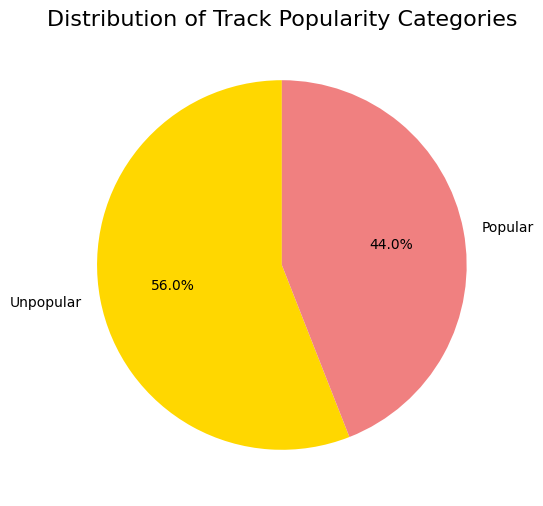

In [ ]:
popularity_threshold = 50

df['popularity_category'] = df['track_popularity'].apply(
    lambda x: 'Popular' if x >= popularity_threshold else 'Unpopular'
)

popularity_counts = df['popularity_category'].value_counts()
plt.figure(figsize=(6, 6))
popularity_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral'], startangle=90)
plt.title('Distribution of Track Popularity Categories', fontsize=16)
plt.ylabel('')
plt.show()

Penjelasan mengenai visualisasi "klasifikasi lagu berdasarkan popularitas" menunjukkan bagaimana nilai `popularity_threshold` mempengaruhi hasil pie chart yang dihasilkan. Threshold ini berfungsi sebagai ambang batas untuk menentukan apakah sebuah lagu tergolong populer atau tidak. Sebagai contoh, ketika `popularity_threshold` diset pada nilai 70, pie chart menunjukkan bahwa 14,7% lagu tergolong populer, sementara 85,3% lainnya dianggap tidak populer. Sebaliknya, ketika threshold diubah menjadi 50, distribusi data menunjukkan bahwa 44,0% lagu dianggap populer dan 56,0% tidak populer. Hal ini mengindikasikan bahwa semakin rendah nilai `popularity_threshold`, semakin banyak lagu yang dikategorikan sebagai populer, karena ambang batas untuk kategori "populer" menjadi lebih rendah. Dengan demikian, nilai `popularity_threshold` sangat mempengaruhi cara lagu-lagu dalam dataset diklasifikasikan sebagai populer atau tidak populer berdasarkan tingkat kepopulerannya.